In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.linear_model import LinearRegression

%matplotlib inline


In [3]:
pwd


'C:\\Users\\matth'

In [6]:
re=pd.read_csv('C:\\Users\\matth\\Downloads\\Real estate (2).csv')


In [20]:
re.describe()

No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148971     17.712560   
std    119.655756             0.281967     11.392485   
min      1.000000          2012.667000      0.000000   
25%    104.250000          2012.917000      9.025000   
50%    207.500000          2013.167000     16.100000   
75%    310.750000          2013.417000     28.150000   
max    414.000000          2013.583000     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  X6 longitude  \
count                       414.000000   414.000000    414.000000   
mean                          4.094203    24.969030    121.533361   
std                           2.945562     0.012410      0.015347   
min                           0.000000    24.932070    121.473530   
25%                           1.000000    24.963000    121.528085   
50%                           4.000000    24.971100    121.538630   
75%                           6.000000    24.977455    121.543305   
max                          10.000000    25.014590    121.566270   

       Y house price of unit area  
count                  414.000000  
mean                    37.980193  
std                     13.606488  
min                      7.600000  
25%                     27.700000  
50%                     38.450000  
75%                     46.600000  
max                    117.500000

In [21]:
re.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [7]:
re.head()


No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

In [8]:
re.tail()

No  X1 transaction date  X2 house age  \
409  410             2013.000          13.7   
410  411             2012.667           5.6   
411  412             2013.250          18.8   
412  413             2013.000           8.1   
413  414             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
409                              4082.01500                                0   
410                                90.45606                                9   
411                               390.96960                                7   
412                               104.81010                                5   
413                                90.45606                                9   

     X5 latitude  X6 longitude  Y house price of unit area  
409     24.94155     121.50381                        15.4  
410     24.97433     121.54310                        50.0  
411     24.97923     121.53986                        40.6  
412     24.96674     121.54067                        52.5  
413     24.97433     121.54310                        63.9

In [9]:
re.shape


(414, 8)

In [10]:
re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [11]:
re.corr()

No  X1 transaction date  \
No                                      1.000000            -0.048658   
X1 transaction date                    -0.048658             1.000000   
X2 house age                           -0.032808             0.017549   
X3 distance to the nearest MRT station -0.013573             0.060880   
X4 number of convenience stores        -0.012699             0.009635   
X5 latitude                            -0.010110             0.035058   
X6 longitude                           -0.011059            -0.041082   
Y house price of unit area             -0.028587             0.087491   

                                        X2 house age  \
No                                         -0.032808   
X1 transaction date                         0.017549   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.025622   
X4 number of convenience stores             0.049593   
X5 latitude                                 0.054420   
X6 longitude                               -0.048520   
Y house price of unit area                 -0.210567   

                                        X3 distance to the nearest MRT station  \
No                                                                   -0.013573   
X1 transaction date                                                   0.060880   
X2 house age                                                          0.025622   
X3 distance to the nearest MRT station                                1.000000   
X4 number of convenience stores                                      -0.602519   
X5 latitude                                                          -0.591067   
X6 longitude                                                         -0.806317   
Y house price of unit area                                           -0.673613   

                                        X4 number of convenience stores  \
No                                                            -0.012699   
X1 transaction date                                            0.009635   
X2 house age                                                   0.049593   
X3 distance to the nearest MRT station                        -0.602519   
X4 number of convenience stores                                1.000000   
X5 latitude                                                    0.444143   
X6 longitude                                                   0.449099   
Y house price of unit area                                     0.571005   

                                        X5 latitude  X6 longitude  \
No                                        -0.010110     -0.011059   
X1 transaction date                        0.035058     -0.041082   
X2 house age                               0.054420     -0.048520   
X3 distance to the nearest MRT station    -0.591067     -0.806317   
X4 number of convenience stores            0.444143      0.449099   
X5 latitude                                1.000000      0.412924   
X6 longitude                               0.412924      1.000000   
Y house price of unit area                 0.546307      0.523287   

                                        Y house price of unit area  
No                                                       -0.028587  
X1 transaction date                                       0.087491  
X2 house age                                             -0.210567  
X3 distance to the nearest MRT station                   -0.673613  
X4 number of convenience stores                           0.571005  
X5 latitude                                               0.546307  
X6 longitude                                              0.523287  
Y house price of unit area                                1.000000

<AxesSubplot:>

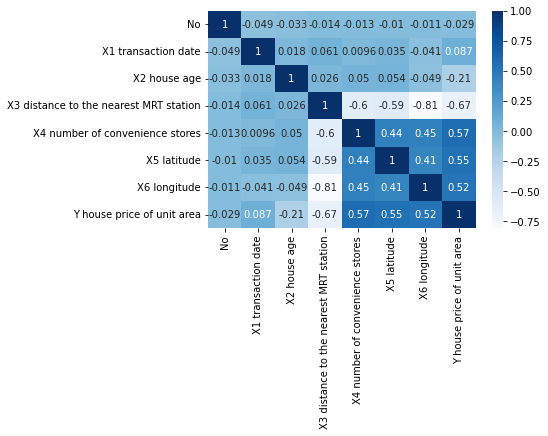

In [19]:
sns.heatmap(re.corr(), annot=True,cmap='Blues')

# exploratory data analysis

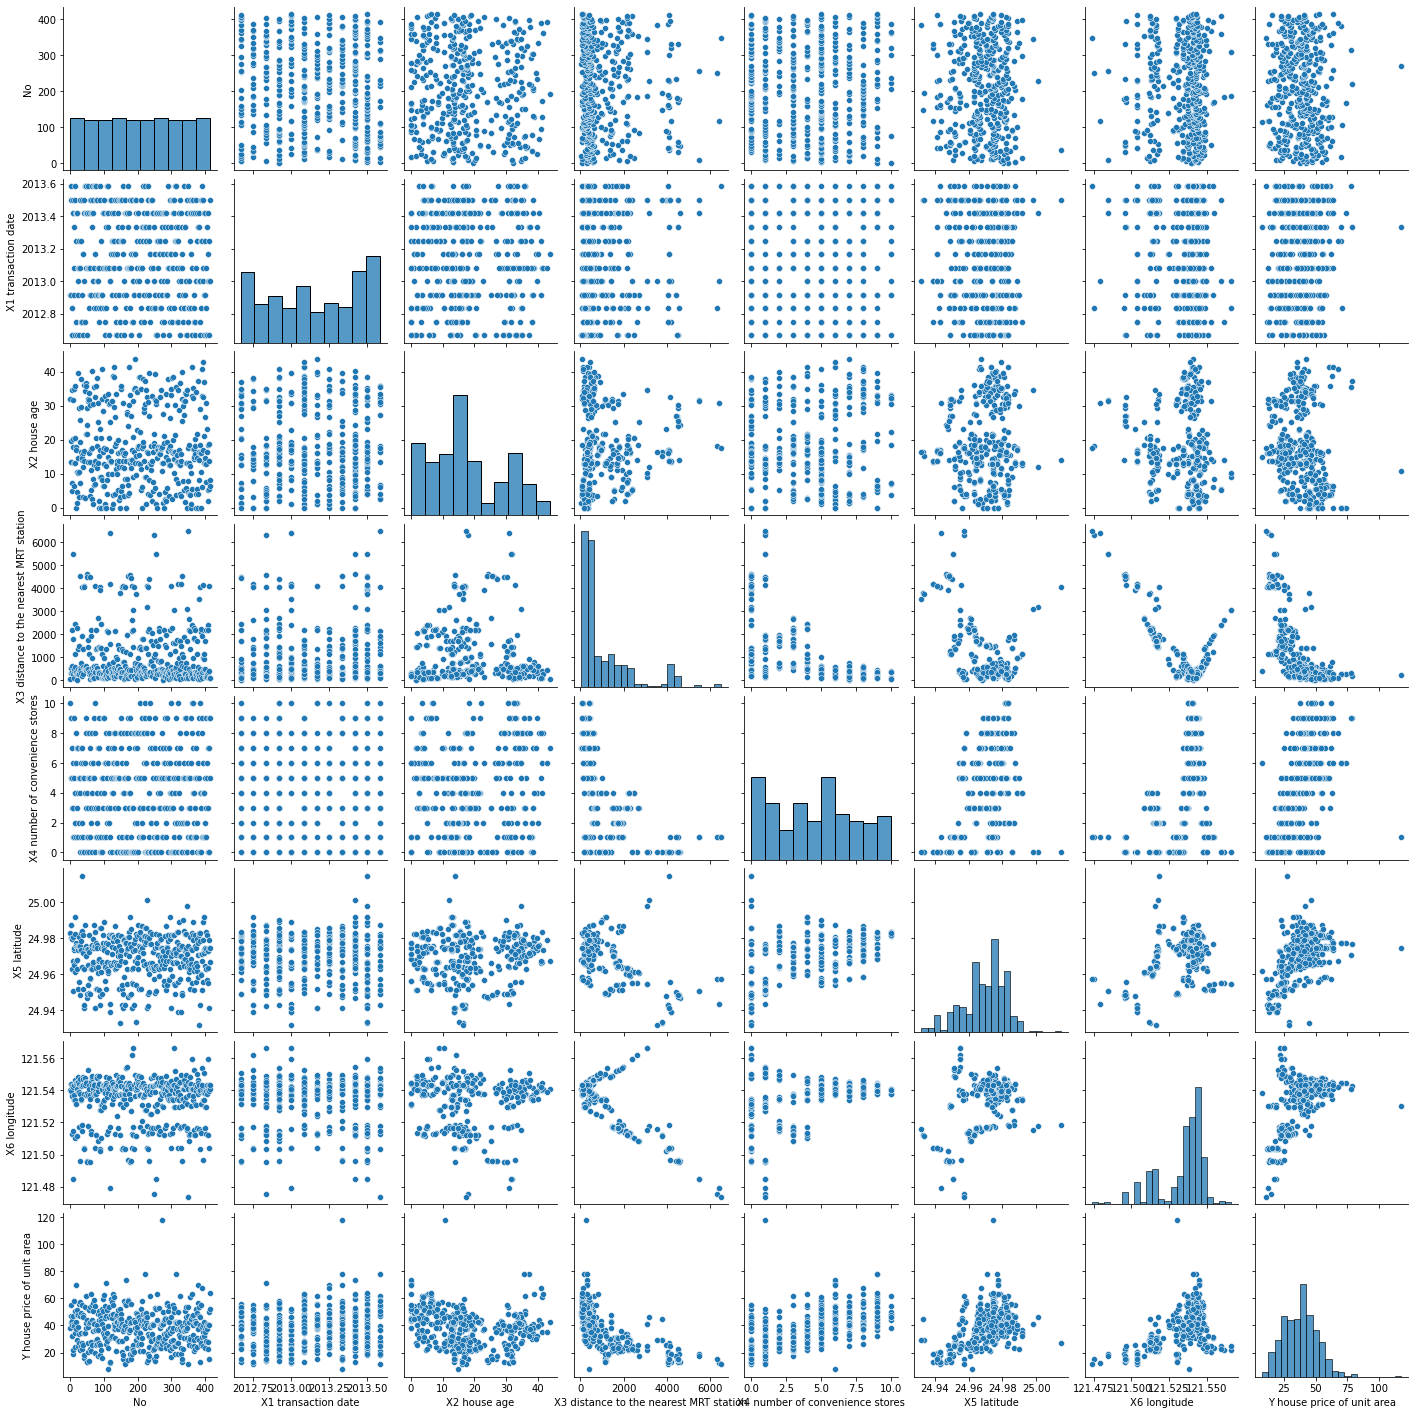

In [22]:
sns.pairplot(re)

 We can clearly see that the house price of unit area is proportional to the number of convenience stores.
 Additionally, we can see that the closer the house is to the nearest MRT station, the heigher the price of unit are is.
 The more the number of convenience stores near the house, the the higher the price of the unit area.
 Unexpectedly, the house age is not proportional to the price of unit area, but we can see a pattern and an obvious outlier.
 A pattern can be noticed in longitude and latitude

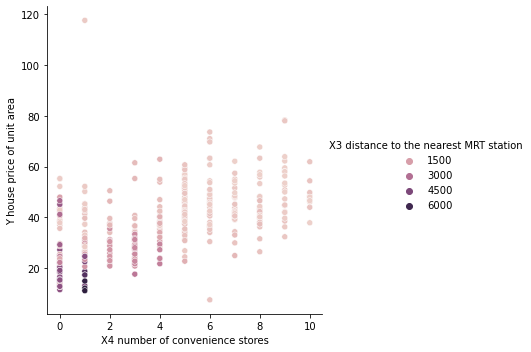

In [50]:
sns.relplot(x='X4 number of convenience stores',y='Y house price of unit area',hue='X3 distance to the nearest MRT station',data=re)

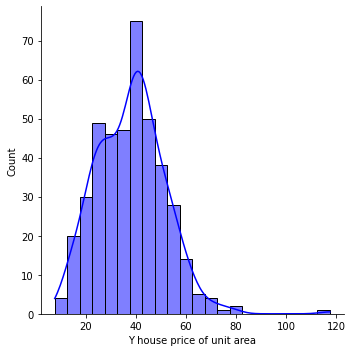

In [52]:
sns.displot(data= re, x='Y house price of unit area', kde=True , color='b')

#x and y arrays
Determine the Features & Target Variable

In [27]:
X=re.drop('Y house price of unit area', axis=1)

y=re['X4 number of convenience stores']

In [28]:
print("X=",X.shape,"\ny=", y.shape)

X= (414, 7) 
y= (414,)


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
X_train.shape

(289, 7)

In [31]:
X_test.shape

(125, 7)

# linear regression


In [32]:
model = LinearRegression()

In [33]:
model.fit(X_train, y_train)

LinearRegression()

# model evaluation

In [34]:
model.coef_

array([-1.26803420e-17, -5.07334605e-15, -5.99955923e-17,  7.07810166e-18,
        1.00000000e+00,  1.09793322e-15, -1.38744293e-15])

In [55]:
pd.DataFrame(model.coef_, X.columns, columns=['Coeficients'])

Coeficients
No                                     -1.268034e-17
X1 transaction date                    -5.073346e-15
X2 house age                           -5.999559e-17
X3 distance to the nearest MRT station  7.078102e-18
X4 number of convenience stores         1.000000e+00
X5 latitude                             1.097933e-15
X6 longitude                           -1.387443e-15

#predict test data

In [36]:
y_pred = model.predict(X_test)

In [53]:
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred }).head(5)

Y_Test        Y_Pred
176       0  2.981729e-14
347       1  1.000000e+00
307       0  1.770598e-14
299      10  1.000000e+01
391       1  1.000000e+00

#  Regression Evaluation Metrics

In [37]:
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE=metrics.mean_squared_error(y_test, y_pred)
RMSE= np.sqrt(MSE)

In [38]:
MAE

8.680231759506717e-15

In [39]:
MSE

1.2839983222448305e-28

In [40]:
RMSE


1.1331364976227845e-14

In [54]:
pd.DataFrame([MAE, MSE, RMSE], index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

Metrics
MAE   8.680232e-15
MSE   1.283998e-28
RMSE  1.133136e-14

In [41]:
re['X4 number of convenience stores'].mean()

4.094202898550725

#residuals

In [42]:
test_residual= y_test - y_pred

In [43]:
pd.DataFrame({'Error Values': (test_residual)}).hvplot.kde()

:Distribution   [Error Values]   (Density)

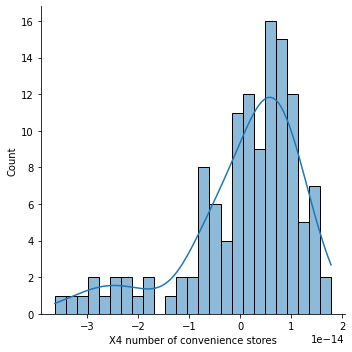

In [44]:
sns.displot(test_residual, bins=25, kde=True)

#Residual plot shows residual error VS. true y value.